Duplicate key in file WindowsPath('C:/ProgramData/Anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 253 ('font.family:  sans-serif')
Duplicate key in file WindowsPath('C:/ProgramData/Anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 261 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file WindowsPath('C:/ProgramData/Anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 404 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


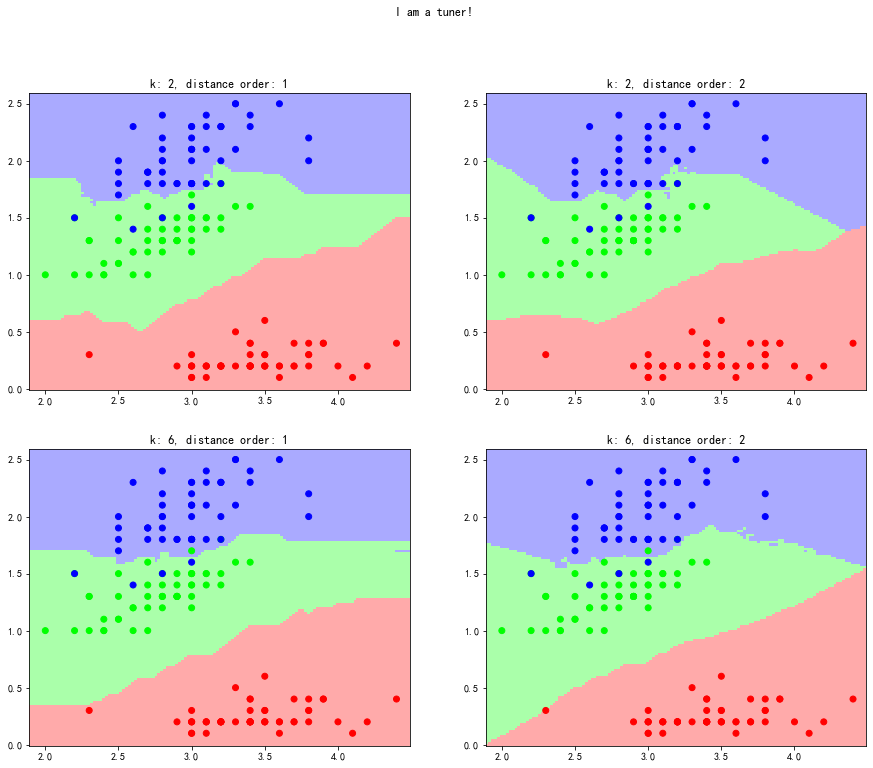

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris

# %matplotlib inline

iris = load_iris()  # 加载数据
X = iris.data[:, (1, 3)]  # 为方便画图，仅采用数据的其中两个特征
y = iris.target

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 决策边界，用不同颜色表示
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


def knn_code(loc, k=5, order=2 ):  # k order是超参
    # print(order)
    diff_loc = X - loc
    dis_loc = np.linalg.norm(diff_loc, ord=order, axis=1) # 没有axis得到一个数，矩阵的泛数。axis=0，得到两个数
    knn = y[dis_loc.argsort()[:k]]
    counts = np.bincount(knn)
    return np.argmax(counts)


line_loc = np.array(list(zip(xx.ravel(), yy.ravel())))

plt.figure(figsize=(15, 12))  # 图的尺寸

pos = 1  # 位置计数器

for k in [2, 6]:
    for order in [1, 2]:
        Z = np.array([knn_code(ii, k, order) for ii in line_loc]).reshape(xx.shape)  # 这个是不支持向量化运算的
        ax = plt.subplot(220 + pos)  # 几行，几列，第几个，先按行数
        ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')  # 绘制预测结果图
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)  # 补充训练数据点
        ax.set_title(f'k: {k}, distance order: {order}')
        pos += 1

plt.suptitle('I am a tuner!')
plt.show()



In [2]:
line_loc = np.array(list(zip(xx.ravel(), yy.ravel()))) = np.array(list(zip(xx.ravel(), yy.ravel())))

In [3]:
line_loc

array([[1.9 , 0.  ],
       [1.92, 0.  ],
       [1.94, 0.  ],
       ...,
       [4.44, 2.58],
       [4.46, 2.58],
       [4.48, 2.58]])

In [7]:
loc = line_loc[0]
loc

array([1.9, 0. ])

In [12]:
diff_loc = X - loc
diff_loc[:5]

array([[1.6, 0.2],
       [1.1, 0.2],
       [1.3, 0.2],
       [1.2, 0.2],
       [1.7, 0.2]])

In [15]:
X[:5]

array([[3.5, 0.2],
       [3. , 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.6, 0.2]])

In [19]:
dis_loc = np.linalg.norm(diff_loc, ord=order, axis=1)
dis_loc

array([1.61245155, 1.11803399, 1.31529464, 1.21655251, 1.71172428,
       2.03960781, 1.52970585, 1.5132746 , 1.0198039 , 1.20415946,
       1.81107703, 1.5132746 , 1.1045361 , 1.1045361 , 2.10950231,
       2.53179778, 2.03960781, 1.62788206, 1.92353841, 1.92353841,
       1.5132746 , 1.84390889, 1.71172428, 1.48660687, 1.5132746 ,
       1.11803399, 1.55241747, 1.61245155, 1.5132746 , 1.31529464,
       1.21655251, 1.55241747, 2.20227155, 2.30867928, 1.21655251,
       1.31529464, 1.61245155, 1.70293864, 1.11803399, 1.5132746 ,
       1.62788206, 0.5       , 1.31529464, 1.70880075, 1.94164878,
       1.14017543, 1.91049732, 1.31529464, 1.81107703, 1.41421356,
       1.91049732, 1.98494332, 1.92093727, 1.36014705, 1.74928557,
       1.58113883, 2.12602916, 1.11803399, 1.64012195, 1.61245155,
       1.00498756, 1.86010752, 1.04403065, 1.72046505, 1.64012195,
       1.84390889, 1.86010752, 1.28062485, 1.52970585, 1.25299641,
       2.22036033, 1.58113883, 1.61554944, 1.5       , 1.64012

In [20]:
knn = y[dis_loc.argsort()[:k]]
knn

array([0, 1, 0, 1, 1, 0])

In [24]:
data = [1, 3, 3, 15, 24, 18, 2, 9, 16]
data2 = np.array(data)


In [25]:
data2.argsort()
# data2[data2.argsort()]

array([0, 6, 1, 2, 7, 3, 8, 5, 4], dtype=int64)